# Библиотеки

In [ ]:
from zlib import crc32

import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import jarque_bera
from scipy.stats import shapiro

# Код генерации выборки

In [ ]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    data = rs.randn(100)
    noise_case = rs.randint(low = 0, high = 3)
    max_attemp_num = 10000
    if noise_case == 0:
        bad = True
        attemps = 0
        while bad and attemps < max_attemp_num:
            data2 = data + rs.laplace(size = (100)) * 0.25
            p1 = jarque_bera(data2)[1]
            p2 = shapiro(data2)[1]
            
            if p1 < 0.05 and p2 > 0.05:
                bad = False
        data = data2
        if bad:
            print ('could not')
    elif noise_case == 1:
        data = data + rs.gamma(1, size=(100))*0.5
    elif noise_case == 2:
        data = data +  rs.uniform()*1.5
        
    return data

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [ ]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task

Enter your mail: a.alchymbaev@phystech.edu


{'mail': 'a.alchymbaev@phystech.edu',
 'id': 3795091167,
 'data': array([ 1.95160907, -0.10228163,  3.0047909 ,  0.03171736,  0.55282711,
         0.66835722,  0.08301235,  1.15312556,  0.0377082 ,  0.83249117,
        -0.96790677,  0.08239102, -0.67626724,  1.37583601,  2.45779136,
        -0.95837583, -2.24068771,  0.23619407,  3.23565166,  1.27456316,
         0.46844486, -0.08362765,  2.53475686, -1.57371422,  0.47406564,
        -0.43018491, -0.83061706,  1.7781319 ,  0.1933219 ,  0.13656689,
        -0.06295347,  0.5893295 ,  0.66565871,  3.45972298,  0.07926704,
        -0.05049302,  0.85159026,  1.45755118, -1.97620475,  0.94207144,
         0.10258871, -0.87235946,  2.67300748,  1.17886008, -1.75850218,
         0.17000237,  1.13356905, -0.00769967,  0.66980492,  2.74179592,
        -0.65142877,  0.46161059,  0.58269164,  0.72787375,  1.62971309,
         3.4914454 ,  0.66537194,  0.48931441,  0.16091939, -0.73533384,
         0.31113818,  0.14680306,  1.21473125,  0.5732684 ,

# Работа с выборкой

In [ ]:
data = task['data']

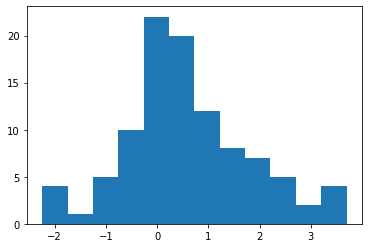

In [ ]:
from matplotlib import pyplot as plt

plt.hist(data, bins=12)
plt.show()


## Выборочное среднее по выборке

In [ ]:
##################
# your code here #
##################
np.mean(data)

0.5930908480221985

## Оценка стандартного отклонения (несмещенная)

In [ ]:
##################
# your code here #
##################
np.std(data, ddof=1)

1.2089859939332568

## Можно ли отклонить гипотезу о нормальности выборки, используя критерий Харке-Бера (p<=0.05)?

In [ ]:
##################
# your code here #
##################
st.jarque_bera(data) 

Jarque_beraResult(statistic=2.1994068894595045, pvalue=0.3329698130108887)

Не отклоняем нормальность выборки

## Можно ли отклонить гипотезу о нормальности выборки, используя критерий Шапиро-Уилка (p<=0.05)?

In [ ]:
##################
# your code here #
##################
st.shapiro(data)


ShapiroResult(statistic=0.975830614566803, pvalue=0.06267676502466202)

Нет

## Сумма единиц в бинаризованной выборке

In [ ]:
##################
# your code here #
##################
binarized_data = (data >= 0).astype(int)
ones_count = binarized_data.sum()
ones_count

72

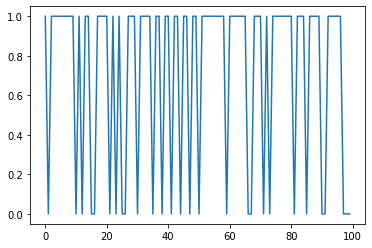

In [ ]:
plt.plot(binarized_data)


## Значение p-value для биномиального теста с двусторонней альтернативой (p0 = 0.5)

In [ ]:
##################
# your code here #
##################
from statsmodels.stats.proportion import binom_test

n = len(binarized_data)
p0 = 0.5
binom_test(ones_count, n, p0, alternative='two-sided')
#или так:
# binom_test(ones_count, n, p0)


1.2579150016678854e-05

In [ ]:
#критерий отношения правдоподобия
#L_0 = st.bernoulli.pmf(k=binarized_data, p=0.5)
#L_MLE = st.bernoulli.pmf(k=binarized_data, p=(sum(binarized_data) / len(binarized_data)))
#LR = 2 * np.log(np.prod(L_MLE / L_0))
#LR

20.03877262249417